# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


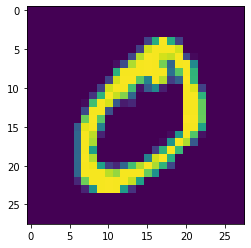

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])


In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [6]:
X_train.shape

(60000, 28, 28, 1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [39]:
from keras.layers import Activation
model = Sequential()

 
# model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
# model.add(Convolution2D(32, 3, 3, activation='relu'))
# model.add(Convolution2D(32, 3, 3, activation='relu'))
# model.add(Convolution2D(32, 3, 3, activation='relu'))
# model.add(MaxPooling2D(2))
# model.add(Convolution2D(10, 1, activation='relu'))
# model.add(Convolution2D(10, 10))
# model.add(Flatten())
# model.add(Activation('softmax'))

model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(MaxPooling2D(2))
model.add(Convolution2D(10, 10))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`


In [40]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 22, 22, 32)        9248      
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 20, 20, 32)        9248      
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 20, 20, 10)        330       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 10, 10)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 1, 1, 10)         

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [42]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/20
60000/60000 [==============================] - 25s 412us/step - loss: 0.1591 - acc: 0.9511
Epoch 2/20
60000/60000 [==============================] - 24s 395us/step - loss: 0.0554 - acc: 0.9834
Epoch 3/20
60000/60000 [==============================] - 23s 388us/step - loss: 0.0425 - acc: 0.9871
Epoch 4/20
60000/60000 [==============================] - 24s 394us/step - loss: 0.0336 - acc: 0.9893
Epoch 5/20
60000/60000 [==============================] - 23s 387us/step - loss: 0.0287 - acc: 0.9915
Epoch 6/20
60000/60000 [==============================] - 23s 385us/step - loss: 0.0242 - acc: 0.9923
Epoch 7/20
60000/60000 [==============================] - 23s 388us/step - loss: 0.0211 - acc: 0.9932
Epoch 8/20
60000/60000 [==============================] - 23s 385us/step - loss: 0.0192 - acc: 0.9935
Epoch 9/20
60000/60000 [==============================] - 23s 386us/step - loss: 0.0158 - acc: 0.9947
Epoch 10/20
60000/60000 [==============================] - 23s 386us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [46]:
print(score)

[0.050564430817840456, 0.99]


In [0]:
y_pred = model.predict(X_test)

In [48]:
print(y_pred[:9])
print(y_test[:9])

[[5.6630684e-17 3.3507910e-18 5.9275965e-12 3.9102703e-13 1.4568539e-20
  1.9236714e-23 2.4103699e-29 1.0000000e+00 3.2335116e-15 1.1946345e-13]
 [7.7897909e-16 9.5878268e-15 1.0000000e+00 5.4452175e-20 9.8936386e-17
  6.8824342e-26 5.5342109e-11 2.7914246e-19 5.6684338e-15 1.0888846e-18]
 [2.5677611e-12 9.9999964e-01 1.3438605e-09 5.5728712e-15 2.5454682e-07
  7.1349724e-13 8.5993113e-10 4.2586004e-10 6.1883789e-08 2.1429436e-14]
 [1.0000000e+00 1.9333130e-26 4.4977758e-13 6.0848365e-18 3.4542677e-19
  2.0107730e-14 2.7093131e-10 8.1427607e-16 2.1928407e-12 2.1243719e-13]
 [3.2413397e-16 2.8649073e-15 1.5536828e-15 1.7130008e-14 1.0000000e+00
  3.8028655e-14 1.9736986e-14 1.1360505e-11 8.4197650e-13 4.2977590e-11]
 [6.1031502e-14 9.9999905e-01 8.9066127e-10 2.3935347e-15 6.1997201e-07
  8.8175500e-14 9.0123135e-12 3.5061640e-07 5.5206111e-09 8.7600234e-13]
 [8.8166500e-20 7.1979828e-17 3.8839744e-14 2.9864467e-20 9.9999738e-01
  2.5312017e-13 3.5686657e-14 1.3764994e-14 2.6178759e-06 

In [49]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
layer_dict

{'activation_5': <keras.layers.core.Activation at 0x7f0500dfc588>,
 'conv2d_24': <keras.layers.convolutional.Conv2D at 0x7f0500e54400>,
 'conv2d_25': <keras.layers.convolutional.Conv2D at 0x7f0500e54470>,
 'conv2d_26': <keras.layers.convolutional.Conv2D at 0x7f0500e54eb8>,
 'conv2d_27': <keras.layers.convolutional.Conv2D at 0x7f0500e5f8d0>,
 'conv2d_28': <keras.layers.convolutional.Conv2D at 0x7f0500e54278>,
 'conv2d_29': <keras.layers.convolutional.Conv2D at 0x7f0500e904a8>,
 'flatten_5': <keras.layers.core.Flatten at 0x7f0500e954a8>,
 'max_pooling2d_5': <keras.layers.pooling.MaxPooling2D at 0x7f0500e9eb70>}

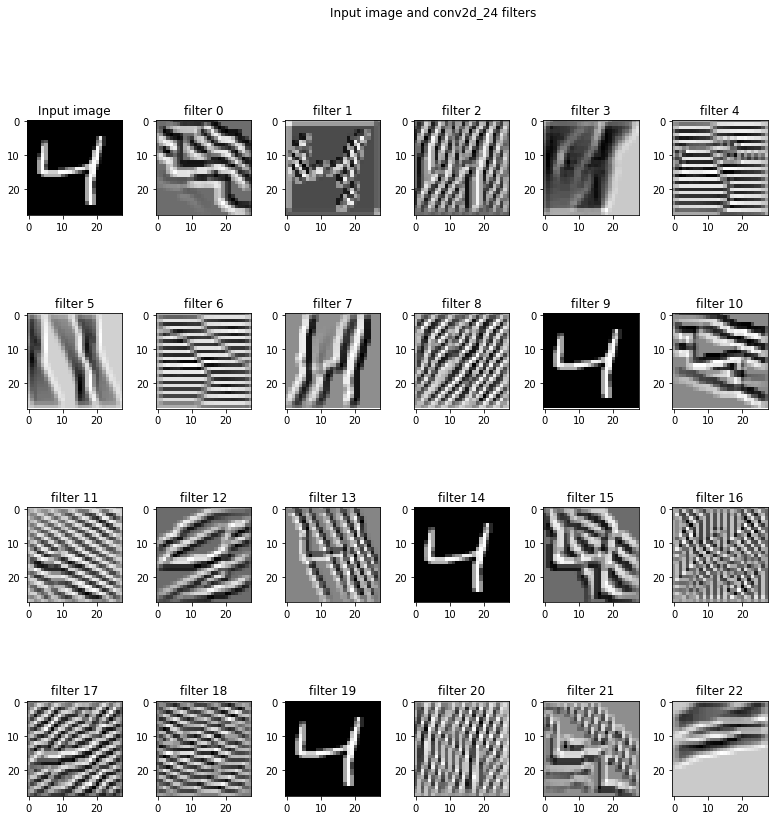

In [51]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter(layer_name = 'conv2d_24')